<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.891 · Aprendizaje automático · PEC2</p>
<p style="margin: 0; text-align:right;">2024-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# PEC 2: Aprendizaje no supervisado

En esta práctica, exploraremos el uso de modelos de lenguaje grandes (LLMs) para la generación de embeddings, aplicaremos técnicas de reducción de dimensionalidad y utilizaremos varios algoritmos de clustering para analizar el feedback de clientes sobre la empresa UPS obtenido de Yelp. Al finalizar, realizaremos un análisis detallado de los resultados obtenidos.

**Importante:** cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

**Importante:** existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de cada PEC. Para cambiar el tipo de celda a este tipo, elegid en el menú: Cell $\to$ Cell Type $\to$ Markdown.

**Importante:** no olvidéis poner vuestro nombre y apellidos en la siguiente celda.

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos: Marina Fernández Delgado</strong>
</div>

Para la realización de la práctica necesitaremos importar los siguientes módulos:

In [1]:
import json
from typing import List

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sentence_transformers import SentenceTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN, MeanShift, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tqdm
import umap

seed = 42

c:\Users\USER\Desktop\OUC\Mi unidad\Aprendizaje Automático\Aprendizaje-Automatico\PEC2\.uoc20241pec2\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
import random

## Carga del conjunto de datos y preprocesado (1.5 puntos)

Se utilizará un dataset de comentarios de clientes sobre la empresa UPS recopilados de [Yelp](https://www.yelp.com/dataset), contenido en el archivo reviews_ups.txt, donde cada línea es una review. Recuerden que puede haber reviews sin contenido, las cuales deberán ser limpiadas durante el preprocesamiento.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> carga las opiniones del archivo en una lista y elimina aquellas opiniones que estén literalmente vacías.
</div>

In [ ]:
reviews = []
stars = []
with open("reviews_stars_ups.json", encoding="utf-8") as reviews_json:
    for line in reviews_json:
        review = json.loads(line)
        if review.get("text") and review.get("stars"):
            reviews.append(review['text'])
            stars.append(review['stars'])


Hoy en día, el análisis de texto en lenguaje natural ha sido revolucionado por los Modelos de Lenguaje Grandes (LLMs), los cuales han reemplazado las técnicas clásicas como TF-IDF y Bag of Words para la representación de texto. Estas técnicas clásicas, aunque útiles, eran limitadas al crear representaciones dispersas y poco contextuales de los textos. En cambio, los LLMs permiten generar representaciones densas o embeddings, que capturan de manera mucho más efectiva el significado semántico de las palabras y las relaciones entre ellas.

Para comprender como funcionan los modelos de lenguaje se recomienda el siguiente video que, en el minuto 12, explica visualmente la parte de embeddings (representación vectorial de palabras o frases) que usaremos en la PEC: https://www.youtube.com/watch?v=wjZofJX0v4M

En esta práctica, vamos a crear una representación densa (embedding) de las reviews utilizando MiniLM, un modelo ligero que ofrece una excelente capacidad para generar embeddings de texto manteniendo un balance entre rendimiento y eficiencia computacional. MiniLM está basado en la arquitectura Transformer, similar a otros modelos más grandes como BERT, pero optimizado para ser más pequeño y rápido, lo que lo hace ideal para tareas como la nuestra. En concreto, utilizaremos la versión "all-MiniLM-L6-v2", que puedes descargar comprimida en un fichero zip desde el siguiente enlace: https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/all-MiniLM-L6-v2.zip

Una vez descargado el archivo, debes descomprimirlo y colocar el directorio extraído en el mismo directorio donde se encuentra este notebook, para facilitar su carga.

Para cargar el modelo, utilizaremos la biblioteca sentence-transformers, la cual es una herramienta que facilita el uso de modelos preentrenados para la generación de embeddings de texto. Esta biblioteca está construida sobre modelos como BERT, MiniLM, y otros, y nos permite, con unas pocas líneas de código, transformar frases y textos en representaciones vectoriales de alta calidad. Aquí puedes encontrar más documentación sobre sentence-transformers y el modelo en concreto de MiniLM: https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

Al tener el modelo descargado en local sólo es necesario indicar el nombre del directorio descomprimido donde se encuentra el modelo (que coincide con el nombre del modelo).

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> carga el modelo de MiniLM y crea el embedding para la frase "Estoy resolviendo la PEC 2"
</div>

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

sentence = "Estoy resolviendo la PEC 2"

embedding = model.encode(sentence)

print("Embedding de la frase:", embedding)

Embedding de la frase: [-7.00403377e-02  5.59271034e-03  8.94933660e-03 -3.57912146e-02
 -1.77086014e-02  1.41381733e-02  1.74983051e-02  5.57031520e-02
  6.63310662e-02  4.29408364e-02  3.02218609e-02 -5.52677102e-02
 -4.61016297e-02 -7.80338328e-03  6.44558854e-03 -5.32381721e-02
 -5.97277284e-02  6.00203574e-02  9.35156718e-02  1.44746415e-02
  8.35292488e-02 -6.34975582e-02  1.09872017e-02  3.06907296e-02
 -1.00369602e-01  2.81132422e-02  8.96264426e-03  9.83165652e-02
 -1.62965264e-02 -9.66346338e-02 -1.14686158e-03  4.11547013e-02
 -2.95518897e-02 -4.11166772e-02  4.85373102e-03 -3.07908356e-02
  6.44602254e-02 -1.17470711e-01 -4.65607420e-02 -2.74999999e-02
 -5.04073538e-02 -8.70288163e-03 -9.73562226e-02 -7.69929290e-02
  1.95321590e-02 -3.16262692e-02  6.89966232e-02  3.12487967e-02
 -6.16860501e-02 -5.12726977e-02  4.17428277e-02 -1.82659309e-02
  2.84827165e-02 -4.81493846e-02  2.49189492e-02  6.75427914e-02
 -4.27156501e-03  2.97034113e-03  8.13463330e-02  9.09801051e-02
  

Para crear los embeddings de cada una de las frases del dataset, debemos tener en cuenta que este proceso puede ser algo más lento que algunas otras operaciones, ya que implica transformar cada frase en una representación densa a través de un modelo de lenguaje. Dependiendo del tamaño del dataset y de la capacidad de la máquina, el tiempo requerido podría ser de unos 5 minutos en una máquina estándar. Sin embargo, podemos aplicar ciertas optimizaciones para acelerar este proceso.

Una manera eficiente de hacerlo es procesar las frases en lotes (batches) en lugar de procesarlas una por una. La biblioteca sentence-transformers nos permite pasar directamente la lista completa de frases y dividirlas en lotes más pequeños, haciendo que el cálculo de los embeddings sea más rápido al aprovechar la capacidad de paralelización de la máquina. Para esto, podemos utilizar el parámetro batch_size en el método `encode()`. Por ejemplo, si configuramos `batch_size=256`, indicaremos al modelo que procese 256 reviews al mismo tiempo, lo cual acelera el procesamiento considerablemente. Si el proceso es muy lento, puedes reducir este número para que se adapte a las características de tu máquina.

Además, para poder realizar un seguimiento del progreso del cálculo, podemos habilitar una barra de progreso con el parámetro `show_progress_bar=True`. Esto nos permitirá tener una visión clara de cuánto falta para completar el procesamiento, lo cual es especialmente útil cuando trabajamos con datasets grandes.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> calcula el embedding de todas las reviews (no vacías)
</div>

In [5]:
embeddings = model.encode(reviews, batch_size=256, show_progress_bar=True)
print("Número de embeddings generados:", len(embeddings))

Batches:   0%|          | 0/18 [00:00<?, ?it/s]

Número de embeddings generados: 4485


<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Cuántas dimensiones tiene el embedding generado por MiniLM?
</div>

In [6]:
embeddings.shape

(4485, 384)

El número de dimensiones que tiene el embedding generado por MiniLm es 384 dimensiones cada una de los 4485 registros que hay.

## Reducción de dimensionalidad (2.5 puntos)

El embedding generado por el modelo tiene una alta dimensionalidad. Aunque esta representación es ideal para capturar relaciones semánticas complejas entre frases, es difícil de interpretar y visualizar directamente debido a la alta cantidad de dimensiones.

Para poder visualizar los embeddings y entender mejor cómo se agrupan las reviews similares, necesitamos reducir la dimensionalidad del espacio a algo más manejable, como 2 dimensiones. Al hacerlo, podemos representar gráficamente las frases en un plano, lo que nos permitirá identificar patrones, clusters de frases similares y relaciones entre diferentes opiniones.

En cuanto a la visualización, dado que tenemos miles de puntos (uno por cada embedding generado), es importante asegurarnos de que el gráfico no se vuelva confuso o demasiado saturado. Para ello, utilizaremos un `scatter` plot de Matplotlib y aprovecharemos el parámetro `alpha=0.1`, el cual ajusta la transparencia de los puntos en el gráfico. Esto nos permitirá visualizar claramente las áreas más densas, ya que donde haya una mayor concentración de puntos, estos se superpondrán y se verán más oscuros, facilitando la identificación de zonas con alta densidad de opiniones similares.

### PCA (Principal Component Analysis)
PCA encuentra las direcciones de mayor varianza en los datos y proyecta los puntos hacia esas direcciones. Es rápida y eficiente, pero cuidado porque en algunos casos puede no capturar bien las relaciones no lineales presentes en los embeddings.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> reduce a 2 dimensiones cada una de las reviews y visualiza el resultado donde el color de cada punto se corresponda con las estrellas de esa review. Añade una leyenda para poder interpretar los colores.
</div>

In [7]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(embeddings)

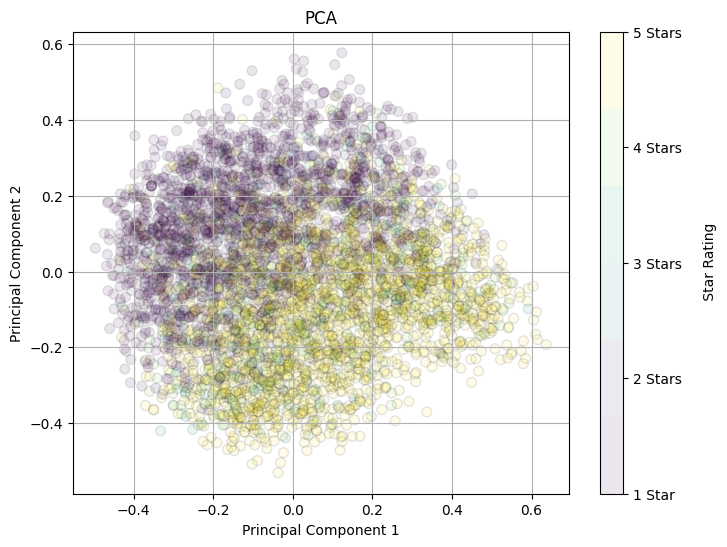

In [8]:
cmap = plt.get_cmap("viridis", 6)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=stars, cmap=cmap, edgecolor='k', s=50, alpha = 0.1)
plt.title("PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
cbar = plt.colorbar(scatter, ticks=[1, 2, 3, 4, 5])
cbar.ax.set_yticklabels(['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']) 
cbar.set_label('\n Star Rating')
plt.grid(True)
plt.show()

### t-SNE (t-distributed Stochastic Neighbor Embedding)
t-SNE es una técnica para reducir la dimensionalidad preservando las relaciones locales (es decir, mantiene los puntos similares cerca unos de otros). Aunque es más lento que PCA, t-SNE no proyecta linealmente.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> reduce a 2 dimensiones cada una de las reviews y visualiza el resultado donde el color de cada punto se corresponda con las estrellas de esa review. Añade una leyenda para poder interpretar los colores.
</div>

In [9]:
tsne = TSNE(n_components=2, perplexity=50, max_iter=5000, learning_rate = 1000)
X_TSNE = tsne.fit_transform(embeddings)

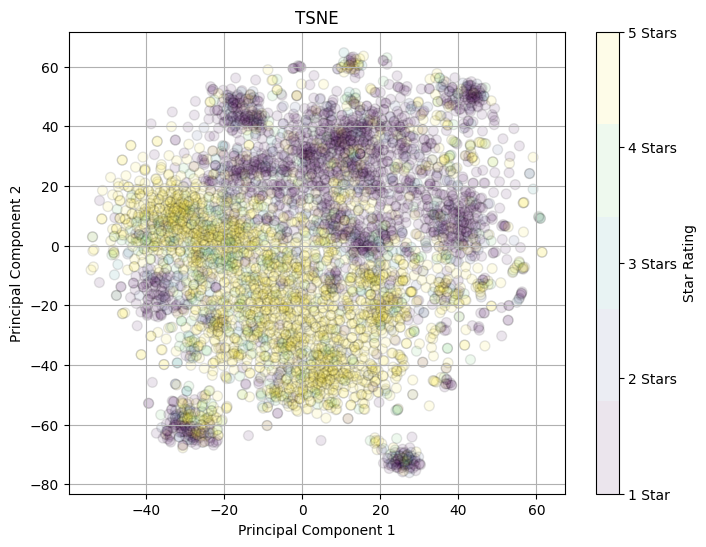

In [10]:
cmap = plt.get_cmap("viridis", 5)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=stars, cmap=cmap, edgecolor='k', s=50, alpha = 0.1)
plt.title("TSNE")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
cbar = plt.colorbar(scatter, ticks=[1, 2, 3, 4, 5])
cbar.ax.set_yticklabels(['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']) 
cbar.set_label('Star Rating')
plt.grid(True)
plt.show()

### UMAP (Uniform Manifold Approximation and Projection)
UMAP es una alternativa relativamente nueva que, al igual que t-SNE, trata de mantener las relaciones locales, pero suele ser más rápido y permite una mayor flexibilidad para ajustar la precisión de los resultados.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> reduce a 2 dimensiones cada una de las reviews y visualiza el resultado donde el color de cada punto se corresponda con las estrellas de esa review. Añade una leyenda para poder interpretar los colores.
</div>

In [11]:
umap_model = umap.UMAP(n_components=2, random_state=seed)
umap_results = umap_model.fit_transform(embeddings)

c:\Users\USER\Desktop\OUC\Mi unidad\Aprendizaje Automático\Aprendizaje-Automatico\PEC2\.uoc20241pec2\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


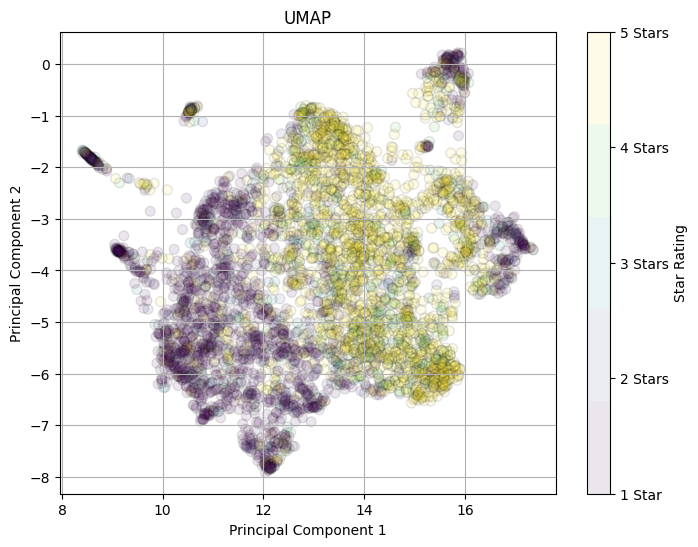

In [12]:
cmap = plt.get_cmap("viridis", 5)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(umap_results[:, 0], umap_results[:, 1], c=stars, cmap=cmap, edgecolor='k', s=50, alpha = 0.1)
plt.title("UMAP")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
cbar = plt.colorbar(scatter, ticks=[1, 2, 3, 4, 5])
cbar.ax.set_yticklabels(['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']) 
cbar.set_label('Star Rating')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué has observado tras su aplicación? Pese a no haber usado la información de las estrellas al realizar los embeddings ¿parece existir una relación entre la disposición de los embeddings y el número de estrellas?
</div>

Si que parece que hay una relación entre los embeddings y las estrellas de cada reseña, porque se puede ver, al menos con los puntajes extremos (1 y 5), que si que se forman como dos grandes grupos y que puede llegar a haber diferencias entre ellos. Además, se puede ver el mismo patrón con los 3 métodos utilizados

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> Si tuvieses que reducir la dimensionalidad para aplicar posteriormente un modelo de aprendizaje supervisado que se entrenará una vez y en producción hará predicciones diarias. ¿Qué ventajas y desventajas tendría cada uno de los métodos? ¿por qué?
</div>

Dentro de los modelos de aprendizaje supervisado, es normal que se tenga que reducir la dimensionalidad, especialmente cuando el nº de categorias es grande, debido a que el aprendizaje puede elevar su coste computacional exponencialmente. Sin embargo, elegir un método de reducción de dimensionalidad es clave para ello.

PCA es un método ágil y eficaz que se fundamenta en descomposiciones matemáticas, lo que la convierte en idónea para grandes conjuntos de datos. Además, es determinística, lo que implica que proporciona resultados consistentes y reproducibles, lo que simplifica la interpretación de los resultados, dado que los elementos principales pueden ser vistos como mezclas lineales de las propiedades originales. No obstante, este método presenta algunas restricciones significativas. Como es un método lineal, podría no ser capaz de capturar las relaciones complejas que existen en los datos, lo que podría resultar en una significativa pérdida de datos. En cambio, no sería la elección más adecuada para visualizar datos en 2D o 3D si la estructura es compleja, dado que podría no representar correctamente la distribución lograda.

t-SNE se destaca por su habilidad de preservar vínculos locales y generar visualizaciones que desvelan agrupaciones en los datos, lo que resulta particularmente beneficioso para investigar la estructura interna de los datos. No obstante, t-SNE presenta inconvenientes importantes; se trata de un método no determinístico, lo que implica que los resultados pueden fluctuar en cada ejecución, lo que dificulta la repetibilidad de los experimentos. Además, su gasto computacional es más alto, lo que podría representar un impedimento en la gestión de grandes cantidades de datos. Dado su carácter y la manera en que procesa los datos, no es apropiado como un paso de preprocesamiento para modelos de predicción, dado que no puede ser invertido con facilidad y no ofrece una representación linealmente separada.

UMAP, en contraste, combina lo mejor de ambos mundos. Es un método versátil que facilita la modificación de diversos factores, como la distancia y la cantidad de vecinos, lo que puede potenciar la calidad de la disminución de dimensiones en función del contexto de los datos. UMAP suele ser más veloz y eficaz en cuanto a memoria que t-SNE, y tiene la habilidad de mantener tanto la estructura local como ciertas relaciones globales, lo que podría resultar beneficioso para tareas futuras de aprendizaje supervisado. No obstante, también plantea retos, tales como la dependencia de la elección de parámetros, que puede influir notablemente en los resultados, y su menor interpretabilidad en comparación con PCA.

Por lo tanto, si el objetivo es aplicar un modelo de aprendizaje supervisado en un entorno de producción, PCA podría llegar a ser la opción más adecuada ya que es un método rápido que ofrece resultados reproducibles. Sin embargo, si los datos muestran relaciones no lineales significativas, UMAP es como una alternativa adecuada, puesto que es capaz de capturar la estructura del modelo de datos sin perder información. Para visualización del comportamiento del modelo reducido, t-SNE y UMAP son las opciones preferibles, aunque si es cierto que UMAP puede ser más eficiente y manejable en conjuntos de datos grandes. 

Por lo tanto en vusta de todo lo anterior, puede ser que la técnica más acertada sea la **UMAP**.

### Validación en 3 dimensiones

Después de visualizar la reducción a dos dimensiones, elige el método de reducción de dimensionalidad que consideres más adecuado.
Luego, valida que las estructuras identificadas se mantienen al extender la visualización a tres dimensiones. Esta validación permite agregar más información y verificar si los patrones observados persisten cuando se incorpora una dimensión adicional, lo cual proporciona una visión más completa de la organización de los datos.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> crea un nuevo embedding proyectando a 3 dimensiones con el método elegido y visualiza con matplotlib manteniendo el color como indicativo del número de estrellas de cada review.
</div>

In [13]:
umap_model = umap.UMAP(n_components=3, random_state=seed)
umap_results = umap_model.fit_transform(embeddings)

c:\Users\USER\Desktop\OUC\Mi unidad\Aprendizaje Automático\Aprendizaje-Automatico\PEC2\.uoc20241pec2\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


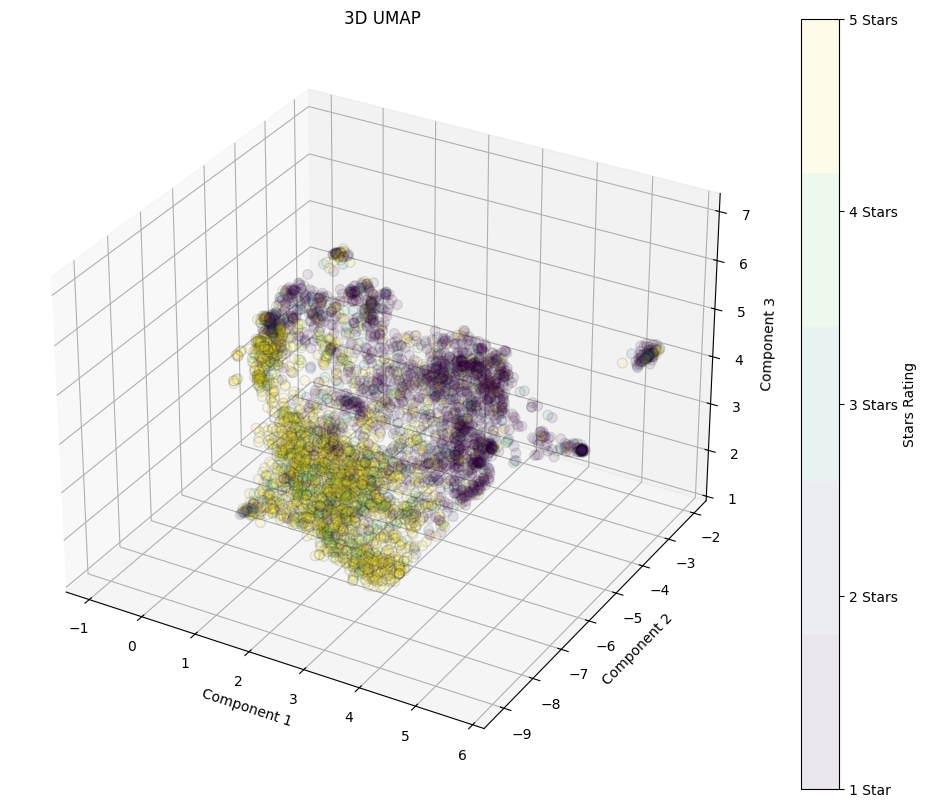

In [14]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(umap_results[:, 0], umap_results[:, 1], umap_results[:, 2],
                     c=stars, cmap=cmap, edgecolor='k', s=50, alpha = 0.1)


ax.set_title("3D UMAP")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")


cbar = plt.colorbar(scatter, ticks=[1, 2, 3, 4, 5])
cbar.ax.set_yticklabels(['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']) 
cbar.set_label('Stars Rating')


plt.show()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Es coherente esta visualización con lo observado en la figura 2d?
</div>

Comaprando ambas figuras si que parece que hay una coherencia entre ellas. Ambas dos tienen un gran cumulo de puntos amarillos relativos a una puntuación de 5 estrellas, al que está pegado el cúmulo de puntuaciones de 1 estrella. Por otro lado, se pueden ver que las puntuaciones de 4 estrellas estan repartidas pero son destacables las que hay en el cúmulo de puntuaciones de 1 estrella. Además también hay pequeños grupos aislados en ambas imágenes, aunque es cierot que en la imagen de 2D, parece que hay más grupos pequeños aislados que en la imagen en 3D, pero no es algo reseñable. En resumen, son imágenes coherentes entre sí que arrojan resultados muy parecidos.

### Dendrograma

Además de la visualización de los datos en 2 dimensiones mediante métodos de reducción de dimensionalidad, podemos también tratar de entender cómo se distribuyen los puntos en el espacio de alta dimensionalidad utilizando una técnica diferente: el **dendrograma**.

Un dendrograma es una **representación gráfica que muestra la estructura jerárquica de un conjunto de datos**. Este tipo de gráfico es especialmente útil para entender las relaciones entre puntos de datos cuando queremos agruparlos de manera jerárquica. El dendrograma se genera como parte del algoritmo de clustering jerárquico, el cual intenta agrupar los datos de manera recursiva, creando una estructura en forma de árbol donde cada hoja representa un punto del dataset y cada bifurcación representa la unión de dos grupos.

Cómo interpretar un dendrograma:

En la parte inferior del dendrograma, cada hoja representa un dato individual (en este caso, una review).
- A medida que nos movemos hacia arriba, los puntos que están más cercanos entre sí se van agrupando, y esos grupos se unen en niveles superiores hasta que, eventualmente, todos los puntos se juntan en un único grupo en la parte superior.
- Las distancias verticales indican la similitud o disimilitud entre los grupos que se están uniendo. Cuanto mayor es la altura a la que se unen dos grupos, mayor es la disimilitud entre ellos. Por lo tanto, un dendrograma nos da una idea visual de qué puntos están más cerca unos de otros y cómo los clusters más pequeños se fusionan para formar clusters más grandes.
- Utilizando un dendrograma, podemos decidir cuántos clusters tiene sentido crear, observando dónde sería adecuado cortar el árbol. Por ejemplo, si encontramos un punto donde los grupos se empiezan a unir con una gran distancia, podría indicar que ese es un buen lugar para cortar y definir el número de clusters.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> visualiza el dendrograma teniendo en cuenta estos parámetros:
<ul>
<li><strong>truncate_mode='level'</strong>: limita la profundidad del dendrograma, mostrando solo un número determinado de niveles de unión, lo cual es útil para evitar un gráfico excesivamente complejo.

<li><strong>p=200</strong>: cuántos clusters o niveles se mostrarán. En este caso, se visualizarán hasta 500 grupos, permitiendo un buen equilibrio entre detalle y simplicidad.

<li><strong>no_labels=True</strong>: oculta las etiquetas de cada punto para evitar que el gráfico se vea sobrecargado y se genere más rápido.

<li><strong>method='single'</strong>: es una manera intuitiva de agrupar las muestras, pues define la distancia entre dos grupos como la distancia entre los puntos más cercanos en cada grupo.
</ul>
</div>

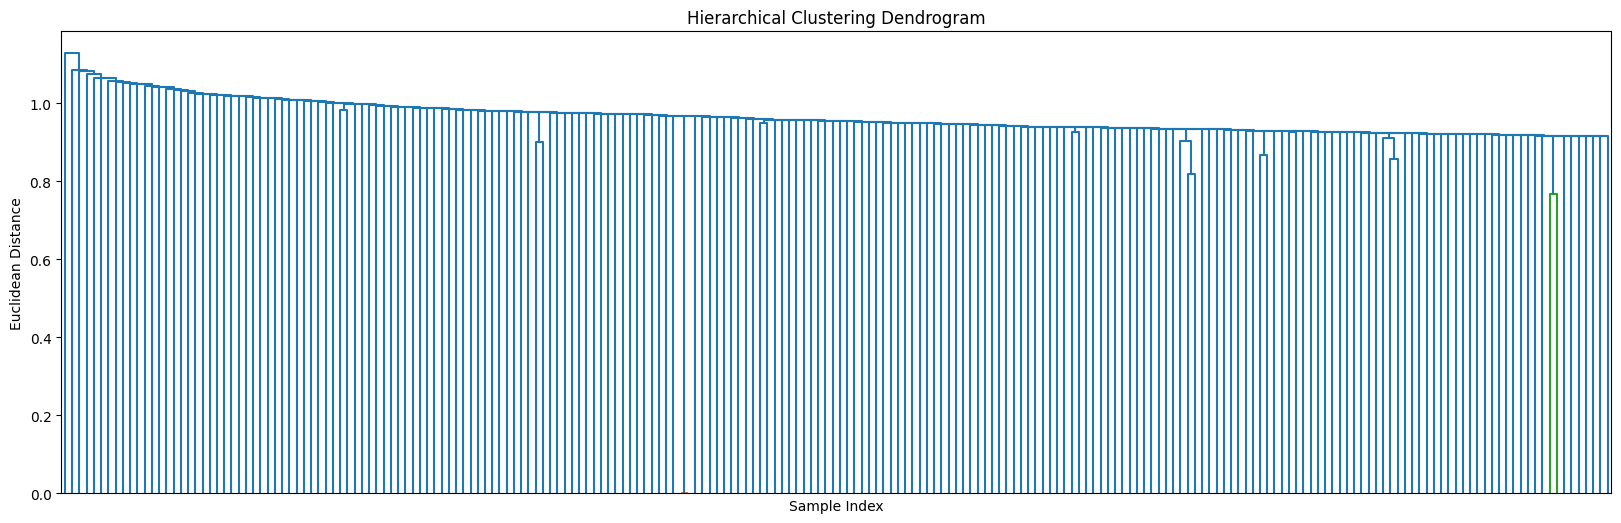

In [15]:
Z = linkage(embeddings, method='single')
plt.figure(figsize=(20, 6))
dendrogram(Z, truncate_mode='level', p = 200, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué podemos observar en el dendrograma? ¿Algo similar a los observado en las reducciones de dimensionalidad?
</div>

En el dendrograma no se ve un agrupamiento claro ya que parece que hay una disminución gradual y más o menos constante de la distancia entre los puntos que conforman el conjunto de datos, por lo que no existe una clara separación entre los clusters. La falta de agrupamientos claros en el dendrograma coincide con la observación de la visualización 3D UMAP, donde se veía una superposición entre los grupos de datos, lo que indicaría que la estrucutra de datos es bastante compleja y su división no es sencilla.

## Clustering (3 puntos)

Tras haber visualizado el conjunto de datos y examinado el dendrograma, hemos obtenido una visión más profunda sobre la estructura y las relaciones internas del dataset. Esta información nos ayudará a tomar una decisión informada sobre cuál es la mejor estrategia de clustering a seguir. Sin embargo, antes de definir nuestra estrategia final, es importante explorar cómo funcionan distintos algoritmos de clustering, para comprender mejor sus ventajas y limitaciones.

En este contexto, realizaremos algunos experimentos utilizando diferentes algoritmos de clustering. Probaremos enfoques como **K-means**, **clustering jerárquico**, **DBSCAN**, y **Mean-Shift**.

Para ello contamos con los siguientes datasets:

In [16]:
n_samples = 1000
blobs_data, blobs_labels = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=seed)
moons_data, moons_labels = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
circles_data, circles_labels = datasets.make_circles(n_samples=n_samples, factor=0.4, noise=0.05, random_state=seed)

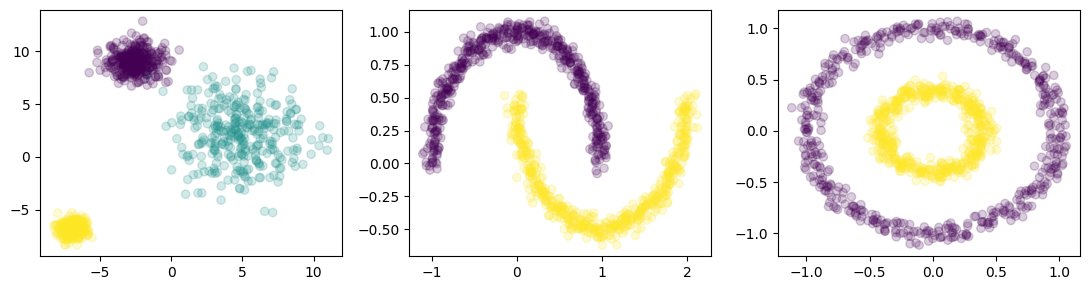

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(11, 3))
ax[0].scatter(blobs_data[:,0], blobs_data[:,1], c=blobs_labels, alpha=.2)
ax[1].scatter(moons_data[:,0], moons_data[:,1], c=moons_labels, alpha=.2)
ax[2].scatter(circles_data[:,0], circles_data[:,1], c=circles_labels, alpha=.2)
plt.tight_layout()

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> aplica K-means a los tres datasets anteriores y visualiza su resultado.
</div>

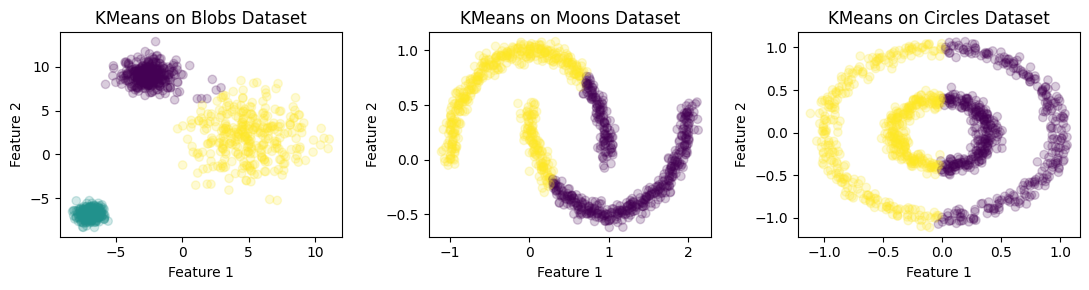

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(11, 3))


kmeans_blobs = KMeans(n_clusters=3, random_state=seed).fit(blobs_data)
predicted_labels_blobs = kmeans_blobs.labels_

ax[0].scatter(blobs_data[:, 0], blobs_data[:, 1], c=predicted_labels_blobs, alpha=0.2)
ax[0].set_title("KMeans on Blobs Dataset")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")


kmeans_moons = KMeans(n_clusters=2, random_state=seed).fit(moons_data)
predicted_labels_moons = kmeans_moons.labels_

ax[1].scatter(moons_data[:, 0], moons_data[:, 1], c=predicted_labels_moons, alpha=0.2)
ax[1].set_title("KMeans on Moons Dataset")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")


kmeans_circles = KMeans(n_clusters=2, random_state=seed).fit(circles_data)
predicted_labels_circles = kmeans_circles.labels_

ax[2].scatter(circles_data[:, 0], circles_data[:, 1], c=predicted_labels_circles, alpha=0.2)
ax[2].set_title("KMeans on Circles Dataset")
ax[2].set_xlabel("Feature 1")
ax[2].set_ylabel("Feature 2")


plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<strong>Implementación:</strong> aplica clustering jerárquico a los tres datasets anteriores y visualiza su resultado.
</div>

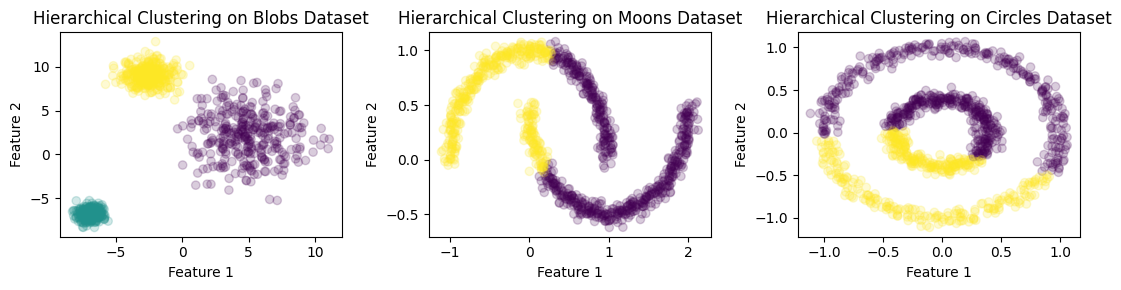

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(11, 3))


agglo_blobs = AgglomerativeClustering(n_clusters=3).fit(blobs_data)
predicted_labels_blobs = agglo_blobs.labels_

ax[0].scatter(blobs_data[:, 0], blobs_data[:, 1], c=predicted_labels_blobs, alpha=0.2)
ax[0].set_title("Hierarchical Clustering on Blobs Dataset")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")


agglo_moons = AgglomerativeClustering(n_clusters=2).fit(moons_data)
predicted_labels_moons = agglo_moons.labels_

ax[1].scatter(moons_data[:, 0], moons_data[:, 1], c=predicted_labels_moons, alpha=0.2)
ax[1].set_title("Hierarchical Clustering on Moons Dataset")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")


agglo_circles = AgglomerativeClustering(n_clusters=2).fit(circles_data)
predicted_labels_circles = agglo_circles.labels_

ax[2].scatter(circles_data[:, 0], circles_data[:, 1], c=predicted_labels_circles, alpha=0.2)
ax[2].set_title("Hierarchical Clustering on Circles Dataset")
ax[2].set_xlabel("Feature 1")
ax[2].set_ylabel("Feature 2")


plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> aplica DBSCAN a los tres datasets anteriores y visualiza su resultado.
</div>

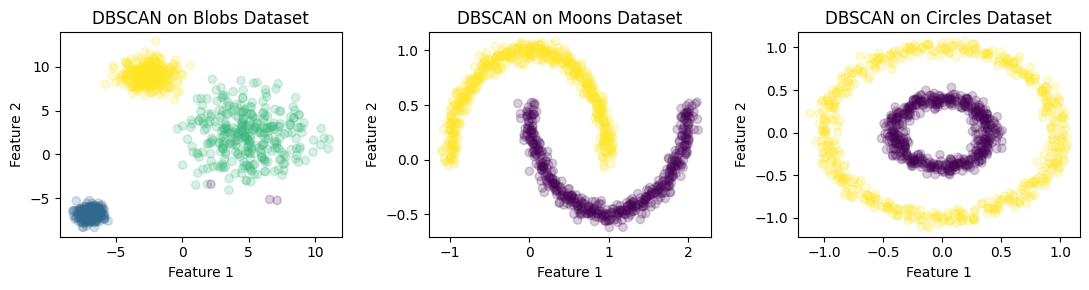

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(11, 3))


agglo_blobs = DBSCAN(eps=1.5).fit(blobs_data)
predicted_labels_blobs = agglo_blobs.labels_

ax[0].scatter(blobs_data[:, 0], blobs_data[:, 1], c=predicted_labels_blobs, alpha=0.2)
ax[0].set_title("DBSCAN on Blobs Dataset")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")


agglo_moons = DBSCAN(eps=0.3).fit(moons_data)
predicted_labels_moons = agglo_moons.labels_

ax[1].scatter(moons_data[:, 0], moons_data[:, 1], c=predicted_labels_moons, alpha=0.2)
ax[1].set_title("DBSCAN on Moons Dataset")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")


agglo_circles = DBSCAN(eps=0.3).fit(circles_data)
predicted_labels_circles = agglo_circles.labels_

ax[2].scatter(circles_data[:, 0], circles_data[:, 1], c=predicted_labels_circles, alpha=0.2)
ax[2].set_title("DBSCAN on Circles Dataset")
ax[2].set_xlabel("Feature 1")
ax[2].set_ylabel("Feature 2")


plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> aplica Mean-shift a los tres datasets anteriores y visualiza su resultado.
</div>

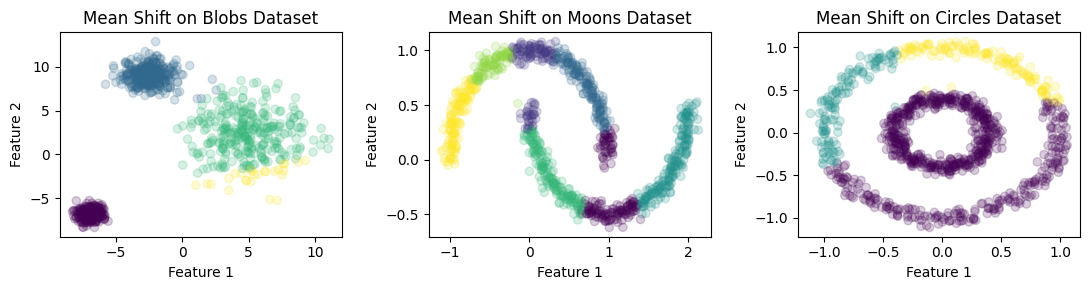

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(11, 3))


mean_shift_blobs = MeanShift(bandwidth=2).fit(blobs_data)
predicted_labels_blobs = mean_shift_blobs.labels_

ax[0].scatter(blobs_data[:, 0], blobs_data[:, 1], c=predicted_labels_blobs, alpha=0.2)
ax[0].set_title("Mean Shift on Blobs Dataset")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")


mean_shift_moons = MeanShift(bandwidth=0.5).fit(moons_data)
predicted_labels_moons = mean_shift_moons.labels_

ax[1].scatter(moons_data[:, 0], moons_data[:, 1], c=predicted_labels_moons, alpha=0.2)
ax[1].set_title("Mean Shift on Moons Dataset")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")


mean_shift_circles = MeanShift(bandwidth=0.5).fit(circles_data)
predicted_labels_circles = mean_shift_circles.labels_

ax[2].scatter(circles_data[:, 0], circles_data[:, 1], c=predicted_labels_circles, alpha=0.2)
ax[2].set_title("Mean Shift on Circles Dataset")
ax[2].set_xlabel("Feature 1")
ax[2].set_ylabel("Feature 2")


plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿En qué casos no se ha podido ajustar el resultado del modelo a los clusters originales? ¿Por qué?
</div>

Analizando caso por caso, podemos ver que:

1) **K-Means**: Funciona bien con los "blobs" pero tiene dificultades con los "moons" y "circles" debido a su suposición de clusters esféricos.
2) **Agrupamiento Jerárquico**: Parece funcionar razonablemente bien con los "blobs", pero no es capaz de separar en bien en dos clusters los "moons" y los "circles".
3) **DBSCAN**: Parece funcionar bien con los tres conjuntos de datos, aunque es cierto que con los "blobs" ha clasificado algunos datos mal.
4) **Mean Shift**: Parece ser el algoritmo que peor ha clasificado de los estudiados, porque no funciona del todo bien con ninguno de los 3 métodos.

Hay que tener en cuenta que la eficacia de un algoritmo de clustering depende en gran medida de las características del conjunto de datos. Algoritmos como K-Means, diseñados para clusters esféricos, pueden fallar con datos en forma de media luna o círculos. El algoritmo jerárquico es más flexible en cuanto a la forma de los clusters, pero su rendimiento se ve influenciado por la elección de métricas y criterios. DBSCAN es ideal para clusters de densidad variable, pero puede tener dificultades con densidades muy dispares. Mean Shift, por su parte, es más versátil, adaptándose bien a diversas formas de clusters. Además, factores como el número predefinido de clusters (en el caso de K-Means) y la presencia de ruido o valores atípicos pueden afectar significativamente los resultados de cualquier algoritmo. En definitiva, la selección del algoritmo adecuado requiere un profundo entendimiento tanto de los datos como de las fortalezas y limitaciones de cada técnica.

Ahora que has experimentado con varios algoritmos de clustering y comprendido sus ventajas y desventajas, es momento de tomar una decisión importante:

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué algoritmo de clustering seleccionarás para agrupar el conjunto de datos de reviews? ¿Por qué?
</div>

En vista de todo lo visto anteriormente, eligo utlizar para los siguientes apartados el método **Agglomerative Clustering**. 

A diferencia de **KMeans**, que presupone que los clusters son esféricos y requiere definir un número de clusters a priori, Agglomerative Clustering puede capturar estructuras complejas sin una suposición rígida de forma. En comparación con **DBSCAN**, el cual funciona de forma adecuada en clusters de densidad variada pero puede tener dificultades con datos de alta dimensionalidad y mezclas de densidades, Agglomerative Clustering se adapta mejor a casos en los que existen agrupaciones de diferentes formas y densidades sin necesitar una sensibilidad elevada en la selección de parámetros. A su vez, frente a **MeanShift**, que requiere definir un parámetro de banda que puede ser difícil de ajustar y es computacionalmente costoso en grandes volúmenes de datos, Agglomerative Clustering es menos costoso computacionalmente y más escalable. 

Al final, el método **Agglomerative Clustering** tiene la capacidad para generar una jerarquía de clusters y tiene flexibilidad en estructuras variadas, por lo que lo convierten en una elección adecuada para este análisis.

**Aplícalo al conjunto de datos de reviews**. Si encuentras problemas de rendimiento debido al tamaño del conjunto de datos original, puedes reducir el problema utilizando un conjunto de puntos en 3D en lugar del dato original para que el cálculo sea más rápido y eficiente.


<div class="alert alert-block alert-info">
<strong>Implementación:</strong> Aplica el algoritmo de clustering seleccionado al conjunto de datos de reviews y visualiza su resultado. Modifica los parámetros del algoritmo para que se adapte al dato.
</div>

In [22]:
agglo_embeddings = AgglomerativeClustering(n_clusters = 3).fit(embeddings)
predicted_labels_agglo_embeddings = agglo_embeddings.labels_

c:\Users\USER\Desktop\OUC\Mi unidad\Aprendizaje Automático\Aprendizaje-Automatico\PEC2\.uoc20241pec2\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


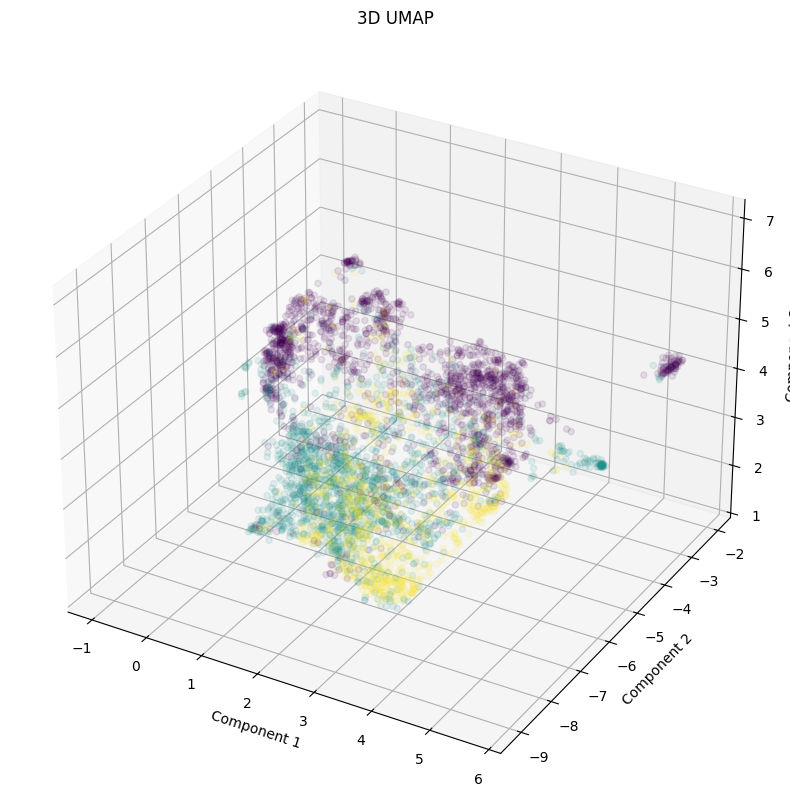

In [25]:
umap_model = umap.UMAP(n_components=3, random_state=seed)
umap_results = umap_model.fit_transform(embeddings)


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(umap_results[:, 0], umap_results[:, 1], umap_results[:, 2],
                     c=predicted_labels_agglo_embeddings, alpha = 0.1)


ax.set_title("3D UMAP")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")


plt.show()

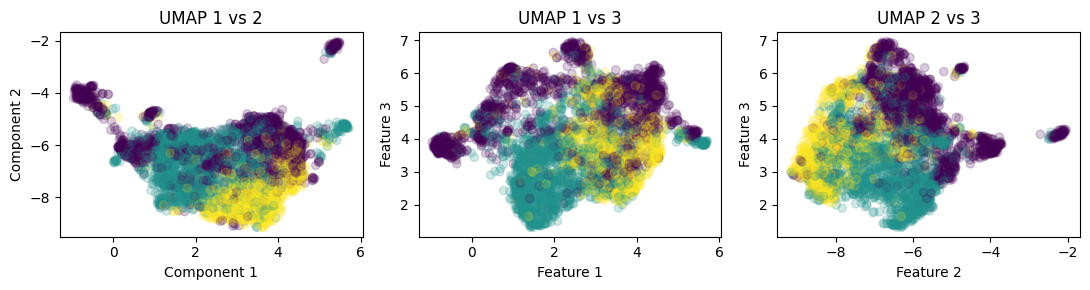

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(11, 3))


ax[0].scatter(umap_results[:, 0], umap_results[:, 1], c=predicted_labels_agglo_embeddings, alpha=0.2)
ax[0].set_title("UMAP 1 vs 2")
ax[0].set_xlabel("Component 1")
ax[0].set_ylabel("Component 2")


ax[1].scatter(umap_results[:, 0], umap_results[:, 2], c=predicted_labels_agglo_embeddings, alpha=0.2)
ax[1].set_title("UMAP 1 vs 3")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 3")


ax[2].scatter(umap_results[:, 1], umap_results[:, 2], c=predicted_labels_agglo_embeddings, alpha=0.2)
ax[2].set_title("UMAP 2 vs 3")
ax[2].set_xlabel("Feature 2")
ax[2].set_ylabel("Feature 3")


plt.tight_layout()
plt.show()

## Análisis de los clusters (3 puntos)

Ahora que has realizado el clustering, es momento de analizar los resultados obtenidos para poder dar insights al negocio.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> revisa la composición de los clusters. <strong>Para cada cluster</strong> identificado, debes mostrar de manera clara y organizada la siguiente información:
<ul>
<li><strong>Número de reviews</strong> asignadas a ese cluster.
<li><strong>Media de estrellas</strong> de las reviews dentro de ese cluster.
<li><strong>Reviews representativas:</strong> selecciona 5 reviews para cada cluster que permitan tener una idea general de su contenido. Si el método de clustering utilizado calcula los centroides (es decir, el "centro" del cluster), selecciona las 5 reviews más cercanas al centroide para una representación más precisa.
Si el método no calcula centroides, simplemente selecciona cualquier 5 reviews del cluster.
</ul>
</div>

In [27]:
cluster_data = list(set(predicted_labels_agglo_embeddings))
print(cluster_data)

[0, 1, 2]


In [28]:
clusters_analysis = {}

cluster_data = list(set(predicted_labels_agglo_embeddings))

clusters_analysis = {cluster_id: {'number_of_reviews': 0, 'total_stars': 0, 'reviews': []} for cluster_id in cluster_data}

for i in range(len(reviews)):
    cluster_id = predicted_labels_agglo_embeddings[i]
    star_rating = stars[i]
    review_text = reviews[i]
    
    clusters_analysis[cluster_id]['number_of_reviews'] += 1
    clusters_analysis[cluster_id]['total_stars'] += star_rating
    clusters_analysis[cluster_id]['reviews'].append(review_text)


In [29]:
cluster_results = {}

for cluster_id, data in clusters_analysis.items():
    mean_stars = data['total_stars'] / data['number_of_reviews'] if data['number_of_reviews'] > 0 else 0
    representative_reviews = random.sample(data['reviews'], min(5, data['number_of_reviews'])) 

    cluster_results[cluster_id] = {
        'number_of_reviews': data['number_of_reviews'],
        'mean_stars': mean_stars,
        'representative_reviews': representative_reviews
    }

In [30]:
def print_cluster_analysis(cluster_id):
    try: 
        print(f"{cluster_id}:")
        print(f"- Número de Reseñas: {cluster_results[cluster_id]['number_of_reviews']}")
        print(f"- Media de Estrellas: {cluster_results[cluster_id]['mean_stars']:.2f}")
        print("- Reseñas Representativas:")
        for review in cluster_results[cluster_id]['representative_reviews']:
            print(f"  - {review}")
    except:
        print(f"Cluster {cluster_id} no encontrado.")


In [31]:
print_cluster_analysis(0)

0:
- Número de Reseñas: 1765
- Media de Estrellas: 2.26
- Reseñas Representativas:
  - I called the store and was answered with a "Can you please hold?" And I sat on hold for more than 5 minutes with no response. I hung up and called back and was answered with the same thing. I tried to respond saying I only had a really quick question (what time did I need to have my package in to have it ship that day) and in the middle of my first few words, there was a click and I was met with silence. I tried calling again a few minutes later and still was unable to speak to anyone.
  - I just went to print out my return label and drop off my amazon rental. First off, the printer wouldn't let me print out a regular pdf document which was the first frustrating thing. Next, I asked the staff member for some assistance but he just offered the computer station, which a lady was using and had been using for the past 20/30 minutes ( I was at the store earlier and forgot my USB so ran back home and she w

In [32]:
print_cluster_analysis(1)

1:
- Número de Reseñas: 1740
- Media de Estrellas: 4.04
- Reseñas Representativas:
  - Quick and efficient! 

Walked in, dropped off my package, got my receipt, and was out in less than a minute!

Professional and courteous!
  - Despite some other no so positive reviews, I use this UPS Store for all my shipping needs.  The gentleman who operates this store is very kind and easy to chat with.  

I drop off all my Zappos returns (who doesn't love shoes) and other online shopping returns free of charge.  Note: Two other mail stores on the south side of town want up to $2 a box to drop off free return items.  

I also use the store to drop off items that I ship to my family back east.  They are always packaged gently and arrive on time.  It is easy for the staff to pull up my account by phone number; all my frequent shipping addresses are stored in my account for easy access.  This expedites the process and gets me in and out of the store quickly.  

The price can be a little higher than I

In [33]:
print_cluster_analysis(2)

2:
- Número de Reseñas: 980
- Media de Estrellas: 3.40
- Reseñas Representativas:
  - Fair pricing and friendly staff. I go out of my way to go here even though I live a minute away from the UPS on Roosevelt and MLK - several times in the past two years I've ended up leaving that UPS store after being quoted a price that was absurd only to find this UPS store providing a reasonable standard price for any UPS service. I will continue going to this store because of their prices and people!
  - Worst service ever. Refused to process return from amazon. The woman at returns is obviously not trained in customer service. She said they don't represent UPS. I would not trust my packages with this place.
  - It is always a pleasure going to this ups store. The staff is courteous fast  and extremely helpful.
  - This UPS store is awesome!  Terry and the other employees are soooo helpful, knowledgeable, efficient, and great at working with the wide variety of customers and their wide variety of n

El último paso es la interpretación de clusters a través del análisis de las muestras pertenecientes a cada cluster.

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Puedes identificar distintos temas o patrones en los mensajes de cada cluster? Comenta la temática de cada cluster.
</div>

**Cluster nº 0, valoración 2.26**

Estas reseñas destacan una mezcla de experiencias en esta tienda de UPS. Si bien algunos clientes han elogiado el excelente servicio al cliente y la eficiencia del personal, otros han informado experiencias negativas, como personal grosero y poco servicial, tiempos de espera prolongados y cargos inesperados. Parece que la calidad del servicio en esta tienda puede variar mucho, según los miembros específicos del personal y la hora del día.

**Cluster nº 1, valoración 4.04**

Estas reseñas destacan las experiencias positivas que han tenido los clientes en esta tienda UPS. El personal recibe constantemente elogios por su amabilidad, su disposición a ayudar y su eficiencia. Los clientes aprecian el servicio personalizado, ya que los empleados suelen dirigirse a ellos por su nombre y recordar sus preferencias de envío. La conveniente ubicación de la tienda y la variedad de servicios que ofrece, como el almacenamiento de paquetes y el envío de correo, también se mencionan como aspectos positivos. El único comentario negativo se relaciona con la situación del estacionamiento, que a veces puede ser un desafío. En general, las reseñas sugieren que esta tienda UPS ofrece un alto nivel de satisfacción del cliente y es una opción confiable para las necesidades de envío.

**Cluster nº 2, valoración 3.40**

Estas reseñas destacan una experiencia mixta con esta tienda de UPS. Algunos clientes elogian al personal amable y eficiente, así como los precios competitivos. Aprecian el servicio personalizado y la conveniencia de la ubicación de la tienda. Sin embargo, otros clientes han tenido experiencias negativas, como que se les haya negado el servicio para devoluciones de Amazon y se hayan encontrado con personal grosero. En general, las reseñas sugieren una variedad de experiencias, con algunos clientes muy satisfechos y otros decepcionados con el servicio.
